In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
# Use loadmat to load matlab files
mat=loadmat("C:\\Users\\kpava\\Documents\\Machine Learning\\Andrew_Ng assignments\\Neural Networks\\ex3data1.mat")
X=mat["X"]
y=mat["y"]

In [2]:
X.shape, y.shape

((5000, 400), (5000, 1))

In [3]:
type(X)

numpy.ndarray

In [4]:
type(y)

numpy.ndarray

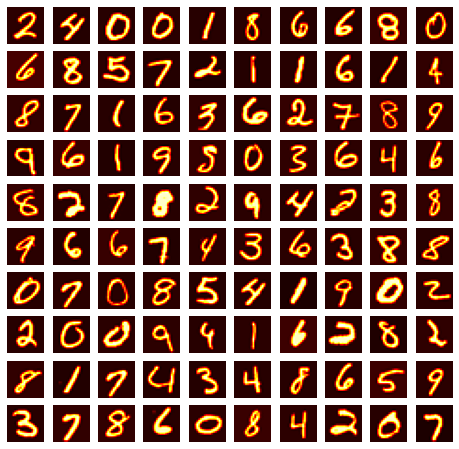

In [20]:
import matplotlib.image as mpimg
fig, axis = plt.subplots(10,10,figsize=(8,8))

for i in range(10):
    for j in range(10):
        axis[i,j].imshow(X[np.random.randint(0,5001),:].reshape(20,20,order="F"), cmap="hot")
        axis[i,j].axis("off")

In [21]:
def sigmoid(z):
    """
    return the sigmoid of z
    """
    
    return 1/ (1 + np.exp(-z))
def lrCostFunction(theta, X, y, Lambda):
    """
    Takes in numpy array of theta, X, y, and float lambda to compute the regularized logistic cost function 
    """
    
    m=len(y)
    predictions = sigmoid(X @ theta)
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = 1/m * sum(error)
    regCost= cost + Lambda/(2*m) * sum(theta[1:]**2)
    
    # compute gradient
    j_0= 1/m * (X.transpose() @ (predictions - y))[0]
    j_1 = 1/m * (X.transpose() @ (predictions - y))[1:] + (Lambda/m)* theta[1:]
    grad= np.vstack((j_0[:,np.newaxis],j_1))
    return regCost[0], grad

In [22]:
theta_t = np.array([-2,-1,1,2]).reshape(4,1)
X_t =np.array([np.linspace(0.1,1.5,15)]).reshape(3,5).T
X_t = np.hstack((np.ones((5,1)), X_t))
y_t = np.array([1,0,1,0,1]).reshape(5,1)
J, grad = lrCostFunction(theta_t, X_t, y_t, 3)
print("Cost:",J,"Expected cost: 2.534819")
print("Gradients:\n",grad,"\nExpected gradients:\n 0.146561\n -0.548558\n 0.724722\n 1.398003")

Cost: 2.534819396109744 Expected cost: 2.534819
Gradients:
 [[ 0.14656137]
 [-0.54855841]
 [ 0.72472227]
 [ 1.39800296]] 
Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003


In [23]:
lrCostFunction(theta_t, X_t, y_t, 3)

(2.534819396109744,
 array([[ 0.14656137],
        [-0.54855841],
        [ 0.72472227],
        [ 1.39800296]]))

In [35]:
def gradientDescent(X,y,theta,alpha,num_iters,Lambda):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = lrCostFunction(theta,X,y,Lambda)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history
m,n = X.shape[0],X.shape[1]
theta = np.zeros((n,1))
gradientDescent(X,y,theta,0.1,200,3)[0]

<ipython-input-21-4fe00c0ed0fb>:14: RuntimeWarning: divide by zero encountered in log
  error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
<ipython-input-21-4fe00c0ed0fb>:14: RuntimeWarning: invalid value encountered in multiply
  error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))


array([[ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 7.70898152e-09],
       [-4.49822384e-05],
       [-3.41407059e-04],
       [ 1.28832598e-02],
       [ 1.64031680e-02],
       [ 6.61440071e-03],
       [ 2.01041833e-03],
       [ 2.29329232e-03],
       [ 6.79431312e-04],
       [-5.07651970e-04],
       [-1.27104157e-03],
       [-2.88923193e-03],
       [-3.11035510e-03],
       [-1.75256506e-03],
       [-5.49741911e-04],
       [-3.69211786e-06],
       [ 5.82753559e-06],
       [ 0.00000000e+00],
       [ 4.90908934e-06],
       [-4.94110166e-05],
       [-1.04994890e-05],
       [-9.65129368e-04],
       [-1.56499547e-03],
       [ 2.09461999e-02],
       [ 7.45430775e-02],
       [ 1.03589872e-01],
       [ 8.01360308e-02],
       [ 2.17858160e-02],
       [-2.01484923e-02],
       [-3.12170919e-02],
       [-3.39840888e-02],
       [-2.52484333e-02],
       [-1.90786701e-02],
       [-1.22830607e-02],
       [-5.21503765e-03],
       [-2.82704034e-03],
       [-8.2

In [46]:
def oneVsAll(X, y, num_labels, Lambda):
    """
    Takes in numpy array of X,y, int num_labels and float lambda to train multiple logistic regression classifiers
    depending on the number of num_labels using gradient descent. 
    
    Returns a matrix of theta, where the i-th row corresponds to the classifier for label i
    """
    m, n = X.shape[0], X.shape[1]
    initial_theta = np.zeros((n+1,1))
    all_theta = []
    all_J=[]
    # add intercept terms
    
    X = np.hstack((np.ones((m,1)),X))
    
    for i in range(1,num_labels+1):
        theta , J_history = gradientDescent(X,np.where(y==i,1,0),initial_theta,1,300,Lambda)
        all_theta.extend(theta)
        all_J.extend(J_history)
    return np.array(all_theta).reshape(num_labels,n+1), all_J
oneVsAll(X,y,10,3)[0]

array([[-3.48645322e-01,  0.00000000e+00,  0.00000000e+00, ...,
         6.93017379e-05,  1.78705996e-07,  0.00000000e+00],
       [-1.49964795e+00,  0.00000000e+00,  0.00000000e+00, ...,
         5.54500484e-04, -6.35849929e-05,  0.00000000e+00],
       [-1.94459367e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -8.18640288e-06,  1.31250466e-07,  0.00000000e+00],
       ...,
       [-3.52402591e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.63488396e-05,  3.39850649e-06,  0.00000000e+00],
       [-2.00814322e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -5.57831347e-05,  2.86022568e-06,  0.00000000e+00],
       [-1.46319115e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.43002053e-04,  3.89062449e-06,  0.00000000e+00]])

In [26]:
np.where(y==1,1,0)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

Text(0.5, 1.0, 'Cost function using Gradient Descent')

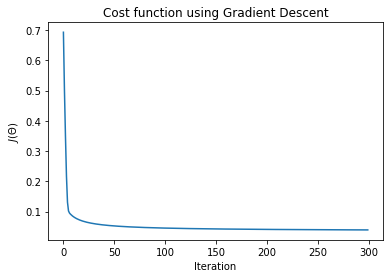

In [42]:
plt.plot(oneVsAll(X,y,10,3)[1][0:300])
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [49]:
def predictOneVsAll(all_theta, X):
    """
    Using all_theta, compute the probability of X(i) for each class and predict the label
    
    return a vector of prediction
    """
    m= X.shape[0]
    X = np.hstack((np.ones((m,1)),X))
    
    predictions = sigmoid(X @ all_theta.T)
    return np.argmax(predictions,axis=1)+1
pred = predictOneVsAll(oneVsAll(X,y,10,3)[0], X)
print("Training Set Accuracy:",sum(pred[:,np.newaxis]==y)[0]/5000*100,"%")



Training Set Accuracy: 91.42 %


In [54]:
sum(pred[:,np.newaxis]==y)

array([4571])

In [50]:
a = np.array([1,2,22,3,21])

In [74]:
y

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)

In [76]:
pred.shape

(5000,)

In [58]:
np.argmax(oneVsAll(X,y,10,3)[0],axis=1)

array([210,  94,  75, 150, 347, 154, 248, 197, 206, 112], dtype=int64)

In [57]:
X.shape

(5000, 400)

In [62]:
b = np.random.rand(3,3)

In [63]:
b

array([[0.94701643, 0.06558083, 0.0143692 ],
       [0.45799193, 0.65466011, 0.09917617],
       [0.37104196, 0.42172083, 0.59422076]])

In [67]:
np.max(b,axis=1)

array([0.94701643, 0.65466011, 0.59422076])

In [68]:
np.argmax(b,axis=1)

array([0, 1, 2], dtype=int64)

In [69]:
c = [[1,2,3],[22,11,44],[1.5,2,9]]

In [73]:
np.argmax(c,axis=1)

array([2, 2, 2], dtype=int64)